In [19]:
import pandas as pd
import matplotlib.pyplot as plt
#import seaborn as sb
import sklearn as skl
import time
from IPython.display import display, clear_output

import sklearn
from sklearn import pipeline      # Pipeline
from sklearn import preprocessing # OrdinalEncoder, LabelEncoder
from sklearn import impute
from sklearn import compose
from sklearn import model_selection # train_test_split
from sklearn import metrics         # accuracy_score, balanced_accuracy_score, plot_confusion_matrix
from sklearn import set_config

set_config(display='diagram') # Useful for display the pipeline

print("Pandas  ", pd.__version__)
print("Sklearn ", skl.__version__) # Try to use 0.24

Pandas   1.2.4
Sklearn  0.24.2


In [21]:
path = "./tabular-playground-feb21/"
!ls $path

Complete solution.ipynb test.csv
sample_submission.csv   train.csv


### Load data

In [24]:
# 1 point 
 #load the train, test and sample_submission data using the is as the index column


# YOUR CODE HERE
df = pd.read_csv(path + 'train.csv', index_col="id")
df_t = pd.read_csv(path + 'test.csv', index_col="id")
sub = pd.read_csv(path + 'sample_submission.csv', index_col="id")
#raise NotImplementedError()

print("Train dataframe:", df.shape)
print("Test dataframe:", df_t.shape)
df.head()

Train dataframe: (300000, 25)
Test dataframe: (200000, 24)


,cat0,cat1,cat2,cat3,cat4,cat5,cat6,cat7,cat8,cat9,...,cont5,cont6,cont7,cont8,cont9,cont10,cont11,cont12,cont13,target
id,,,,,,,,,,,,,,,,,,,,,
1,A,B,A,A,B,D,A,E,C,I,...,0.881122,0.421650,0.741413,0.895799,0.802461,0.724417,0.701915,0.877618,0.719903,6.994023
2,B,A,A,A,B,B,A,E,A,F,...,0.440011,0.346230,0.278495,0.593413,0.546056,0.613252,0.741289,0.326679,0.808464,8.071256
3,A,A,A,C,B,D,A,B,C,N,...,0.914155,0.369602,0.832564,0.865620,0.825251,0.264104,0.695561,0.869133,0.828352,5.760456
4,A,A,A,C,B,D,A,E,G,K,...,0.934138,0.578930,0.407313,0.868099,0.794402,0.494269,0.698125,0.809799,0.614766,7.806457
6,A,B,A,A,B,B,A,E,C,F,...,0.382600,0.705940,0.325193,0.440967,0.462146,0.724447,0.683073,0.343457,0.297743,6.868974


In [25]:
print(sub.shape)
assert df.shape == (300000,25) 
assert df_t.shape == (200000,24) 
assert sub.shape == (200000,1) 

(200000, 1)


### Subsample the data

In [26]:
#1 point
# get a random sample of size 50k, tested with random state 0
dfs = None
# YOUR CODE HERE
dfs = df.sample(50000)
#raise NotImplementedError()

In [27]:
assert dfs.shape == (50000,25)

### There are no missings in this dataset

In [28]:
df.isna().sum().sum(), df_t.isna().sum().sum()

(0, 0)

In [29]:
df.columns

Index(['cat0', 'cat1', 'cat2', 'cat3', 'cat4', 'cat5', 'cat6', 'cat7', 'cat8',
       'cat9', 'cont0', 'cont1', 'cont2', 'cont3', 'cont4', 'cont5', 'cont6',
       'cont7', 'cont8', 'cont9', 'cont10', 'cont11', 'cont12', 'cont13',
       'target'],
      dtype='object')

### Define variables for x and y

In [43]:
cat_vars = ['cat0', 'cat1', 'cat2', 'cat3', 'cat4', 'cat5', 'cat6', 'cat7', 'cat8', 'cat9']
num_vars = ['cont0', 'cont1', 'cont2', 'cont3',  'cont4',  'cont5',  'cont6',
            'cont7', 'cont8', 'cont9', 'cont10', 'cont11', 'cont12', 'cont13']

# 1 point 
# store in X all the categorical and numerical columns
# store in Y the target

x = dfs[cat_vars + num_vars]
y = dfs['target']
# YOUR CODE HERE
#raise NotImplementedError()

(50000, 24)


In [45]:
assert x.shape == (50000,24)
assert y.shape == (50000,)

### See the target variable ([The metric is RMSE](https://www.kaggle.com/c/tabular-playground-series-feb-2021/overview/evaluation))

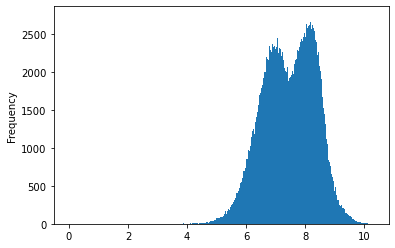

In [46]:
df.target.plot.hist(bins=500);

### See the numerical variables

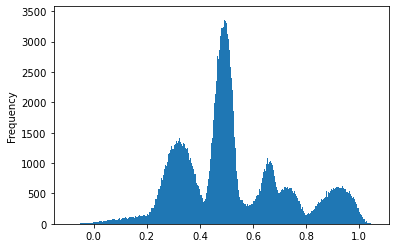

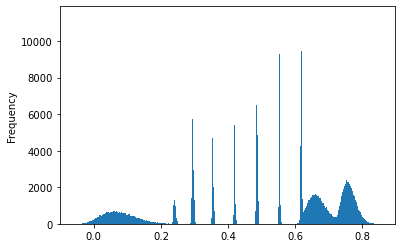

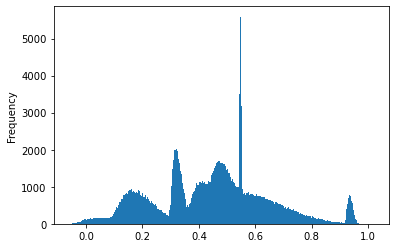

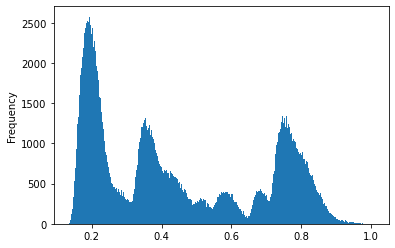

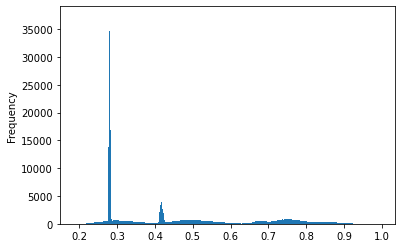

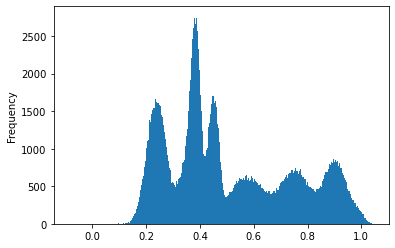

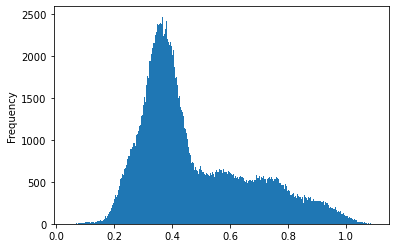

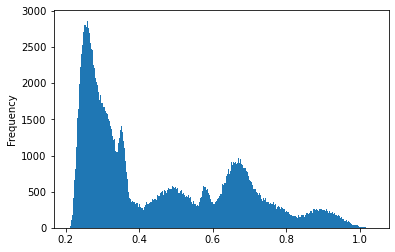

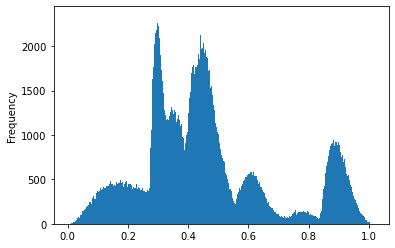

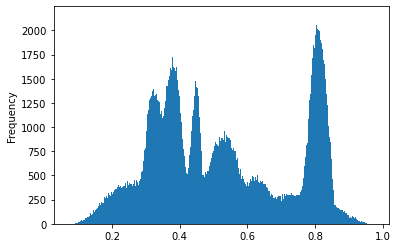

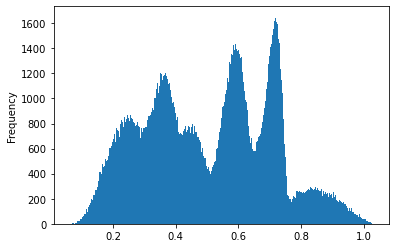

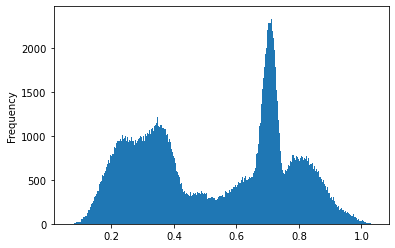

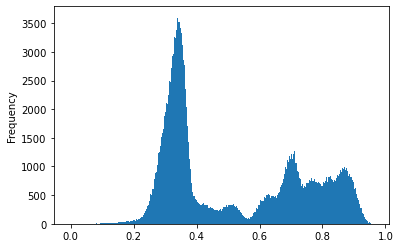

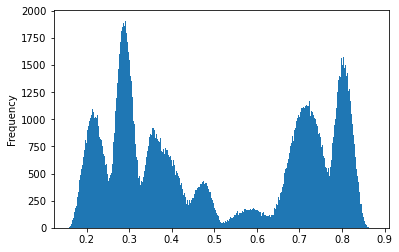

In [48]:
for var in num_vars:
    df[var].plot.hist(bins=500)
    plt.show();

### See the categorical variables (ypu can use `bar()`, `barh()` or `.pie()`)

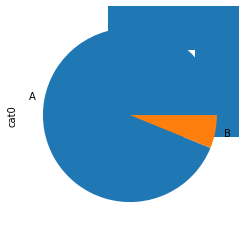

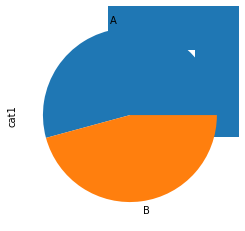

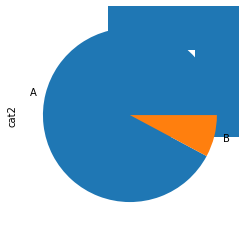

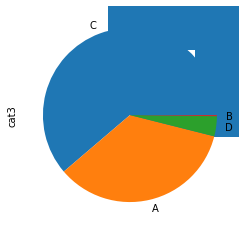

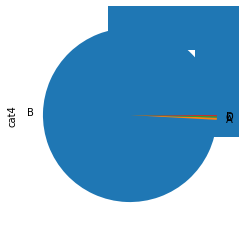

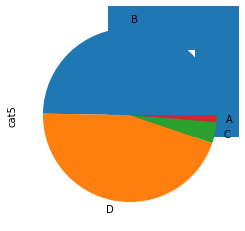

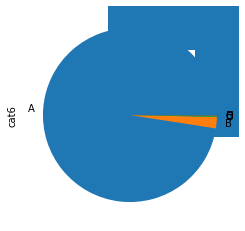

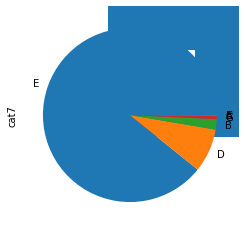

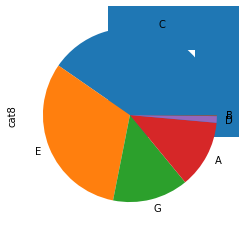

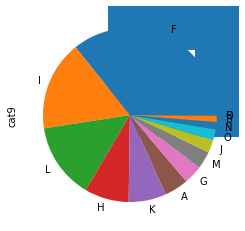

In [49]:
for var in cat_vars:
    df[var].value_counts().plot.bar()
    df[var].value_counts().plot.barh()
    df[var].value_counts().plot.pie()
    plt.show();

# Exercise 1 (2 pts)

Create the `ColumTransformer` for **models based on multiplications and distances**:
- Pipeline for numerical variables (`num_vars`): `Standardscaler()` or `QuantileTransformer(n_quantiles=100, output_distribution='normal')`
- Pipeline for categorical variables (`cat_vars`): `OneHotEncoder(handle_unknown='ignore')`

In [50]:
# YOUR CODE HERE
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder


num_vars_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())])

cat_vars_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', preprocessing.OneHotEncoder(handle_unknown='ignore'))
])

tree_prepro = compose.ColumnTransformer(transformers=[
    ('num', num_vars_transformer, num_vars),
    ('cat', cat_vars_transformer, cat_vars),
], remainder='drop')
#raise NotImplementedError()

tree_prepro

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('scaler', StandardScaler())]),
                                 ['cont0', 'cont1', 'cont2', 'cont3', 'cont4',
                                  'cont5', 'cont6', 'cont7', 'cont8', 'cont9',
                                  'cont10', 'cont11', 'cont12', 'cont13']),
                                ('cat',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(fill_value='missing',
                                                                strategy='constant')),
                                                 ('onehot',
                                                  OneHotEncoder(handle_unknown='ignore'))]),
                                 ['cat0', 'cat1', 'cat2', 'cat3', 'cat4',
                                  'cat5', 'cat6', 'cat7', 'cat8', 'cat9'])])

In [51]:
assert type(tree_prepro) is sklearn.compose._column_transformer.ColumnTransformer

# Exercise 2 (2 pts)

Create the `ColumTransformer` for **models based on trees**:
- Pipeline for numerical variables (`num_vars`): **Do nothing**. Tip: You can use `remainder='passthrough'` when you create the `ColumTransformer`.
- Pipeline for categorical variables (`cat_vars`): `OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)[source]`

In [58]:
# YOUR CODE HERE
#raise NotImplementedError()
from  sklearn.preprocessing import OrdinalEncoder

cat_vars_tree_transformer = Pipeline(steps=[
    ('ordinal', preprocessing.OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1))
])

mult_prepro = compose.ColumnTransformer(transformers=[
    ('ordinal', cat_vars_tree_transformer, cat_vars),
], remainder='passthrough')

mult_prepro

ColumnTransformer(remainder='passthrough',
                  transformers=[('ordinal',
                                 Pipeline(steps=[('ordinal',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=-1))]),
                                 ['cat0', 'cat1', 'cat2', 'cat3', 'cat4',
                                  'cat5', 'cat6', 'cat7', 'cat8', 'cat9'])])

In [59]:
assert type(mult_prepro) is sklearn.compose._column_transformer.ColumnTransformer

## Exercise 3 (2pts)
Reasearch about som models and its hyperparamters

In [65]:
# YOUR CODE HERE
#raise NotImplementedError()

In [67]:
from sklearn.model_selection import cross_val_predict
x_train, x_valid, y_train, y_valid = model_selection.train_test_split(x, y, test_size=0.4, random_state=0)

results = pd.DataFrame({'Model': [], 'MSE': [], 'RMSE': [], 'Time': []})

for name, pipe in all_pipelines.items():

    start_time = time.time()
    preds = 0
    # YOUR CODE HERE
    preds = cross_val_predict(pipe, x_valid, y_valid, cv=4)
    print(preds)
    #raise NotImplementedError()
    
    
#     results = results.append({"Model": name,
#                               "MSE":   # mean sqaure error,
#                               "RMSE":  #mean square error squared,
#                               "Time":  total_time},
#                               ignore_index=True)

    
#     results_ord = results.sort_values(by=['RMSE'], ascending=True, ignore_index=True)
#     results_ord.index += 1 
#     clear_output()
#     display(results_ord.style.bar(subset=['MSE', 'RMSE'], vmin=0, color='#5fba7d'))

NameError: name 'all_pipelines' is not defined

In [60]:
assert results_ord['MSE'].max() < 2
assert results_ord['MSE'].min() < 0.8
assert results_ord['RMSE'].max() < 1.5
assert results_ord['RMSE'].min() < 0.9

NameError: name 'results_ord' is not defined

### Optional Exercise (optional because it takes a lot of time of computation)
Train with a more realable validation data the best models (maybe the best 5 models). You can:
- Use all training data (without subsample)
- Use Crosvalidation (`KFold`)(using 3, 5 or 7 folds) instead of `train_test_split`

In [ ]:
df   = pd.read_csv(path+"train.csv", index_col="id")

print("Using all data with", len(df), "rows")
x = df[num_vars+cat_vars]
y = df["target"]

In [ ]:
# IMPLEMENT SOMETHING SIMILAR TO THE PROCESS BEFORE
# BUT USE KFOLD

# YOUR CODE HERE
raise NotImplementedError()